<a href="https://colab.research.google.com/github/Hoshi54/projects_ML/blob/main/Sov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import chardet

df = pd.read_parquet('~/Desktop/train.parquet — копия')
df['okved'].value_coounts()

NameError: name 'ldf' is not defined

<Axes: xlabel='okved'>

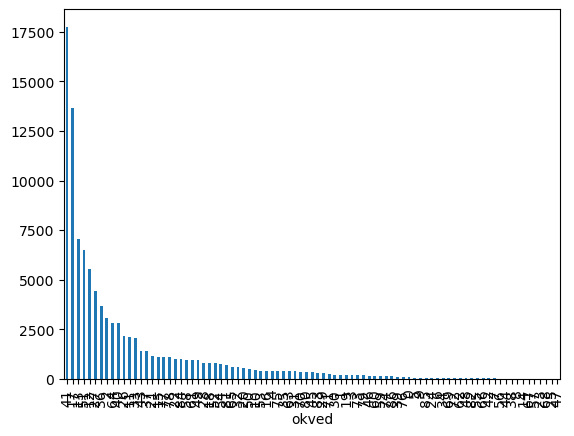

In [ ]:
df['okved'].value_counts().plot(kind = 'bar')

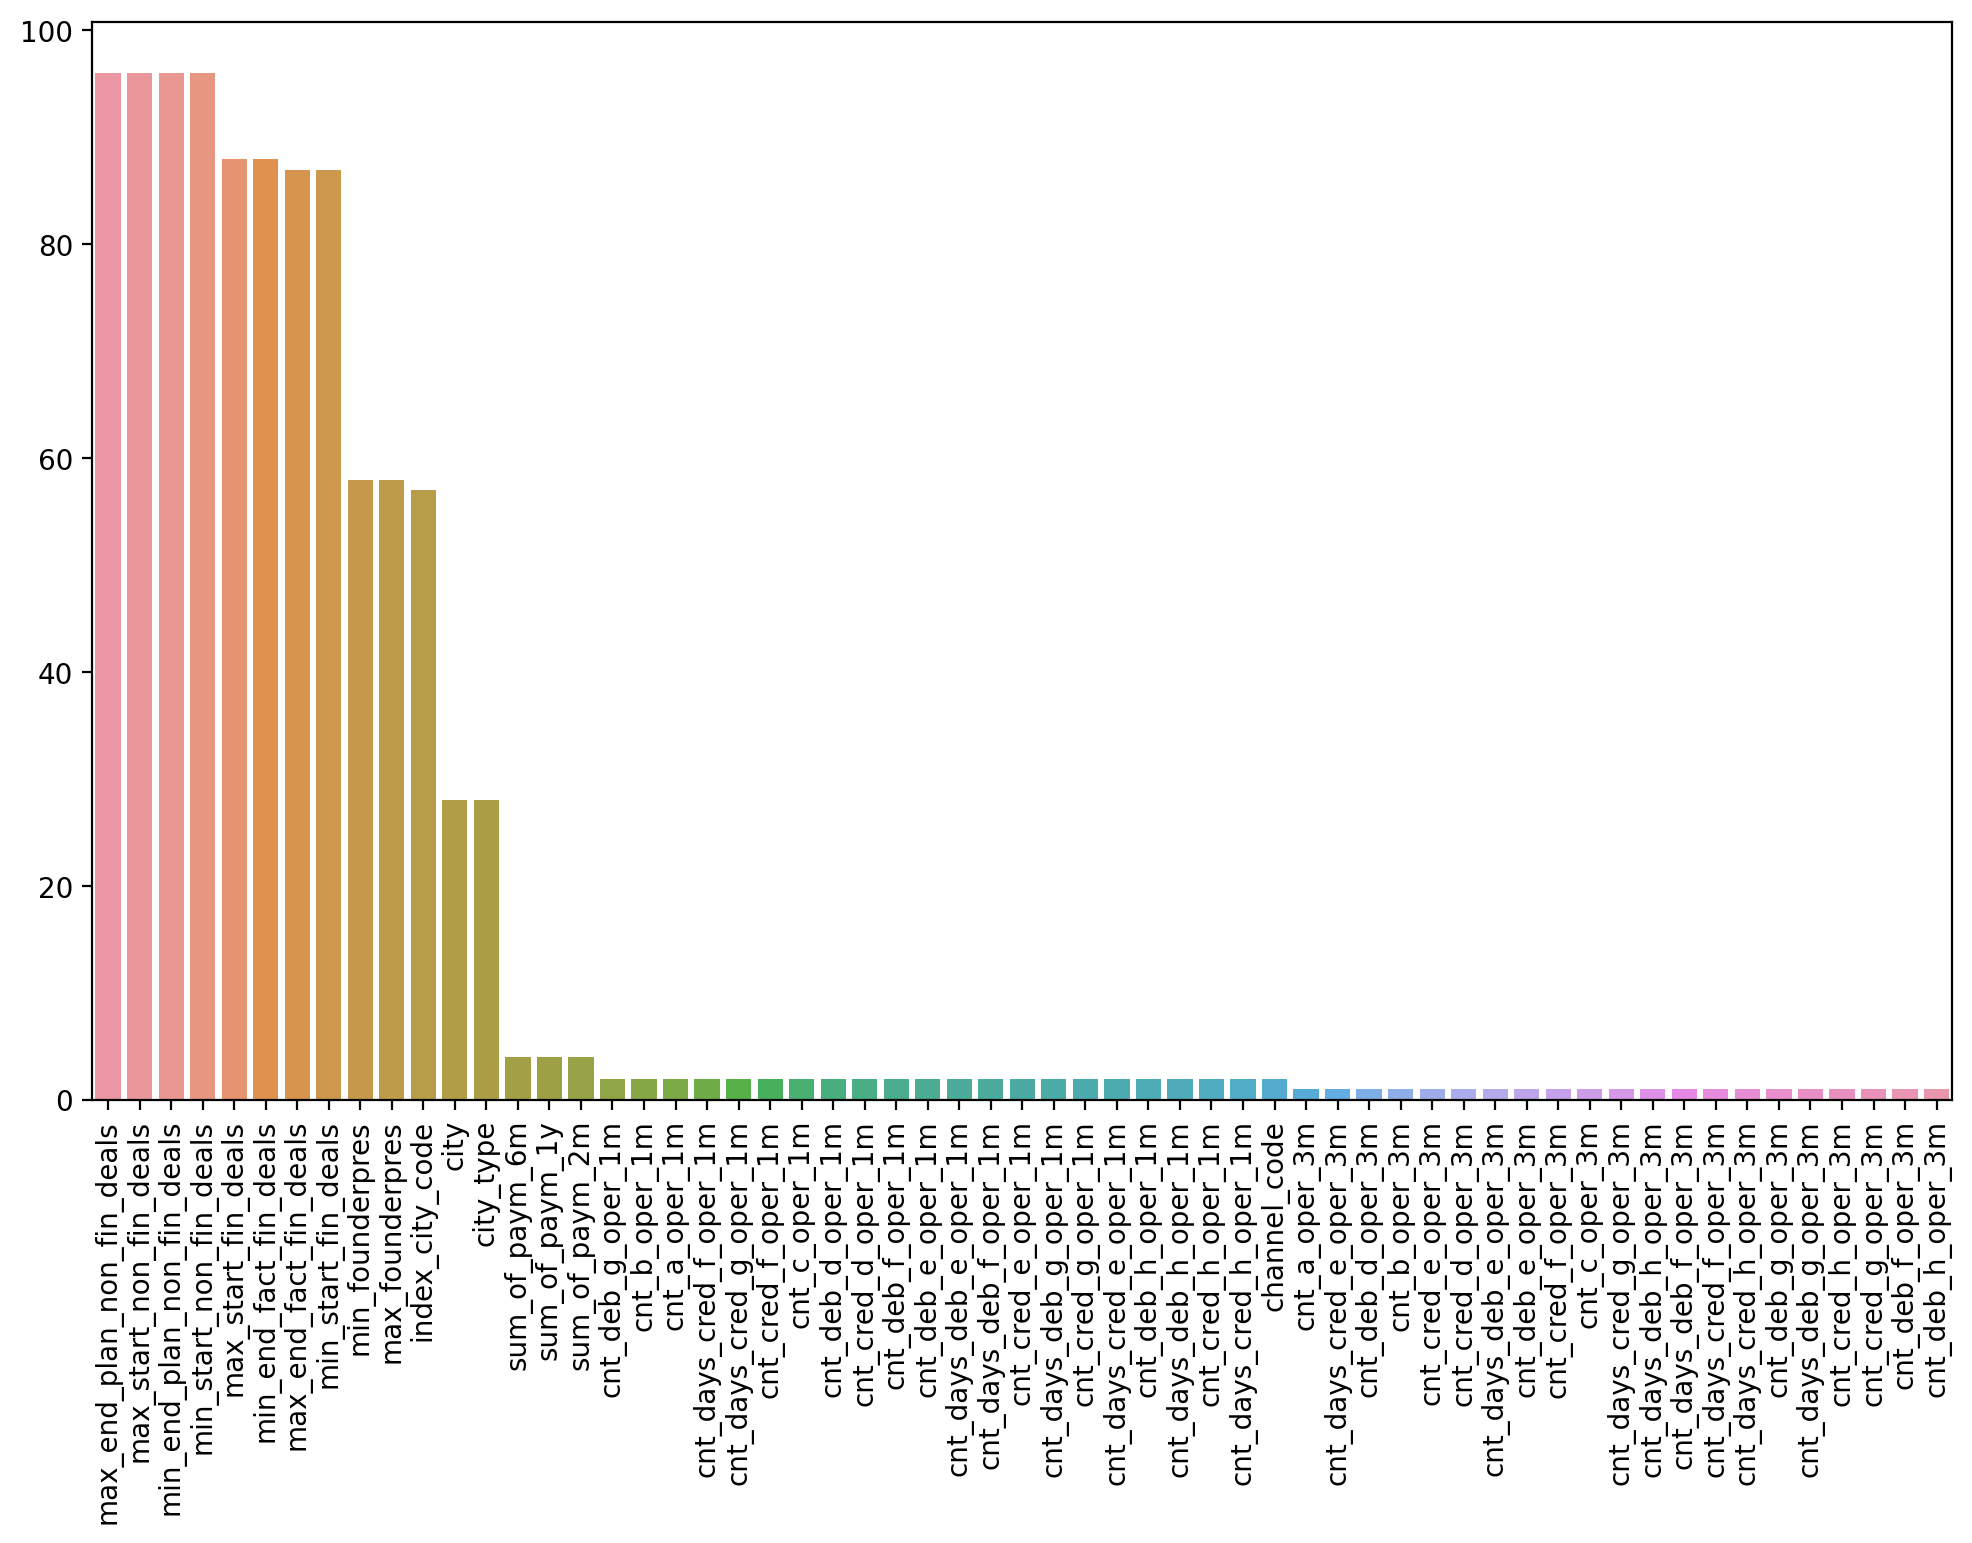

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

res = round(100 * df.isnull().sum() / len(df)).sort_values(ascending = False)
res = res[res > 0]

plt.figure(figsize = (12,7),dpi = 200)
sns.barplot(y = res,x = res.index)
plt.xticks(rotation = 90);

df.drop(res[res > 50].index,axis = 1,inplace = True)

df.drop(['ogrn_days_end_month', 'cnt_cred_h_oper_1m', 'cnt_deb_f_oper_1m',
       'cnt_days_cred_h_oper_1m', 'cnt_deb_h_oper_1m',
       'cnt_deb_g_oper_1m', 'cnt_cred_g_oper_1m',
       'cnt_days_deb_f_oper_1m', 'cnt_cred_d_oper_3m',
       'sum_b_oper_3m', 'cnt_days_cred_h_oper_3m',
       'cnt_cred_d_oper_1m',
       'cnt_days_cred_f_oper_3m', 'cnt_b_oper_3m',
       'cnt_days_deb_g_oper_1m',
       'cnt_cred_f_oper_1m'],axis = 1,inplace = True)


#df[cat_cols] = df[cat_cols].astype(str)

cat_cols = [
    'channel_code', 'city', 'city_type', 'ogrn_month', 'ogrn_year',
    'branch_code', 'okved', 'segment'
]

num_cols = list(df.drop(['channel_code', 'city', 'city_type', 'ogrn_month', 'ogrn_year',
      'branch_code', 'okved', 'segment','target_1','target_2','total_target','id'],axis = 1).columns)

y = df['total_target']
x = df.drop(['total_target','target_1','target_2','id'],axis = 1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

pairs = [
 ['sum_of_paym_1y', 'sum_deb_e_oper_3m'],
 ['cnt_a_oper_1m', 'cnt_a_oper_3m'],
 ['cnt_a_oper_1m', 'sum_cred_g_oper_3m'],
 ['sum_c_oper_1m', 'cnt_c_oper_3m'],
 ['cnt_c_oper_1m', 'sum_cred_g_oper_3m'],
 ['sum_deb_e_oper_1m', 'cnt_deb_g_oper_3m'],
 ['cnt_deb_e_oper_1m', 'sum_deb_f_oper_3m'],
 ['cnt_days_cred_f_oper_1m', 'cnt_cred_f_oper_3m'],
 ['sum_deb_g_oper_1m', 'sum_cred_g_oper_1m'],
 ['sum_deb_g_oper_1m', 'sum_deb_g_oper_3m'],
 ['sum_cred_g_oper_1m', 'sum_deb_g_oper_3m'],
 ['cnt_a_oper_3m', 'sum_cred_g_oper_3m'],
 ['cnt_deb_g_oper_3m', 'cnt_deb_h_oper_3m'],
 ['cnt_cred_g_oper_3m','cnt_days_cred_g_oper_3m']
]

from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

imputer = IterativeImputer(max_iter=10, random_state=0)

df[num_cols] = imputer.fit_transform(df[num_cols])

simp = SimpleImputer(strategy = 'most_frequent')

df[cat_cols] = simp.fit_transform(df[cat_cols])

for pair in pairs:
  df[f'{pair[0]}_{pair[1]}_comp'] = pca.fit_transform(df[pair])

df.drop(list(set(["cnt_deb_h_oper_3m", "sum_of_paym_1y", "sum_deb_e_oper_3m", "cnt_a_oper_1m", "cnt_a_oper_3m",
             "sum_cred_g_oper_3m", "sum_c_oper_1m", "cnt_c_oper_3m", "sum_deb_e_oper_1m", "cnt_deb_g_oper_3m", "cnt_deb_e_oper_1m",
             "sum_deb_f_oper_3m", "cnt_days_cred_f_oper_1m", "cnt_cred_f_oper_3m", "sum_cred_g_oper_1m", "sum_deb_g_oper_1m",
             "sum_deb_g_oper_3m", "sum_cred_g_oper_3m", "cnt_a_oper_3m", "cnt_deb_g_oper_3m", "cnt_deb_h_oper_3m", "cnt_cred_g_oper_3m", "cnt_days_cred_g_oper_3m"])),axis = 1,inplace = True)

from sklearn.utils import compute_class_weight
classes = np.unique(df['total_target'])
weight = compute_class_weight(classes = classes,class_weight = 'balanced',y = y)
class_weight = dict(zip(classes,weight))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [ ]:
cols = []
for col in list(set(df.columns) - set(df[cat_cols])):
  q_low = df[col].quantile(0.01)
  q_hi  = df[col].quantile(0.99)
  df = df.drop(df[(df[col] >= q_hi) | (df[col] <= q_low)].index,axis = 0)


In [ ]:
len(num_cols)

64

<Axes: >

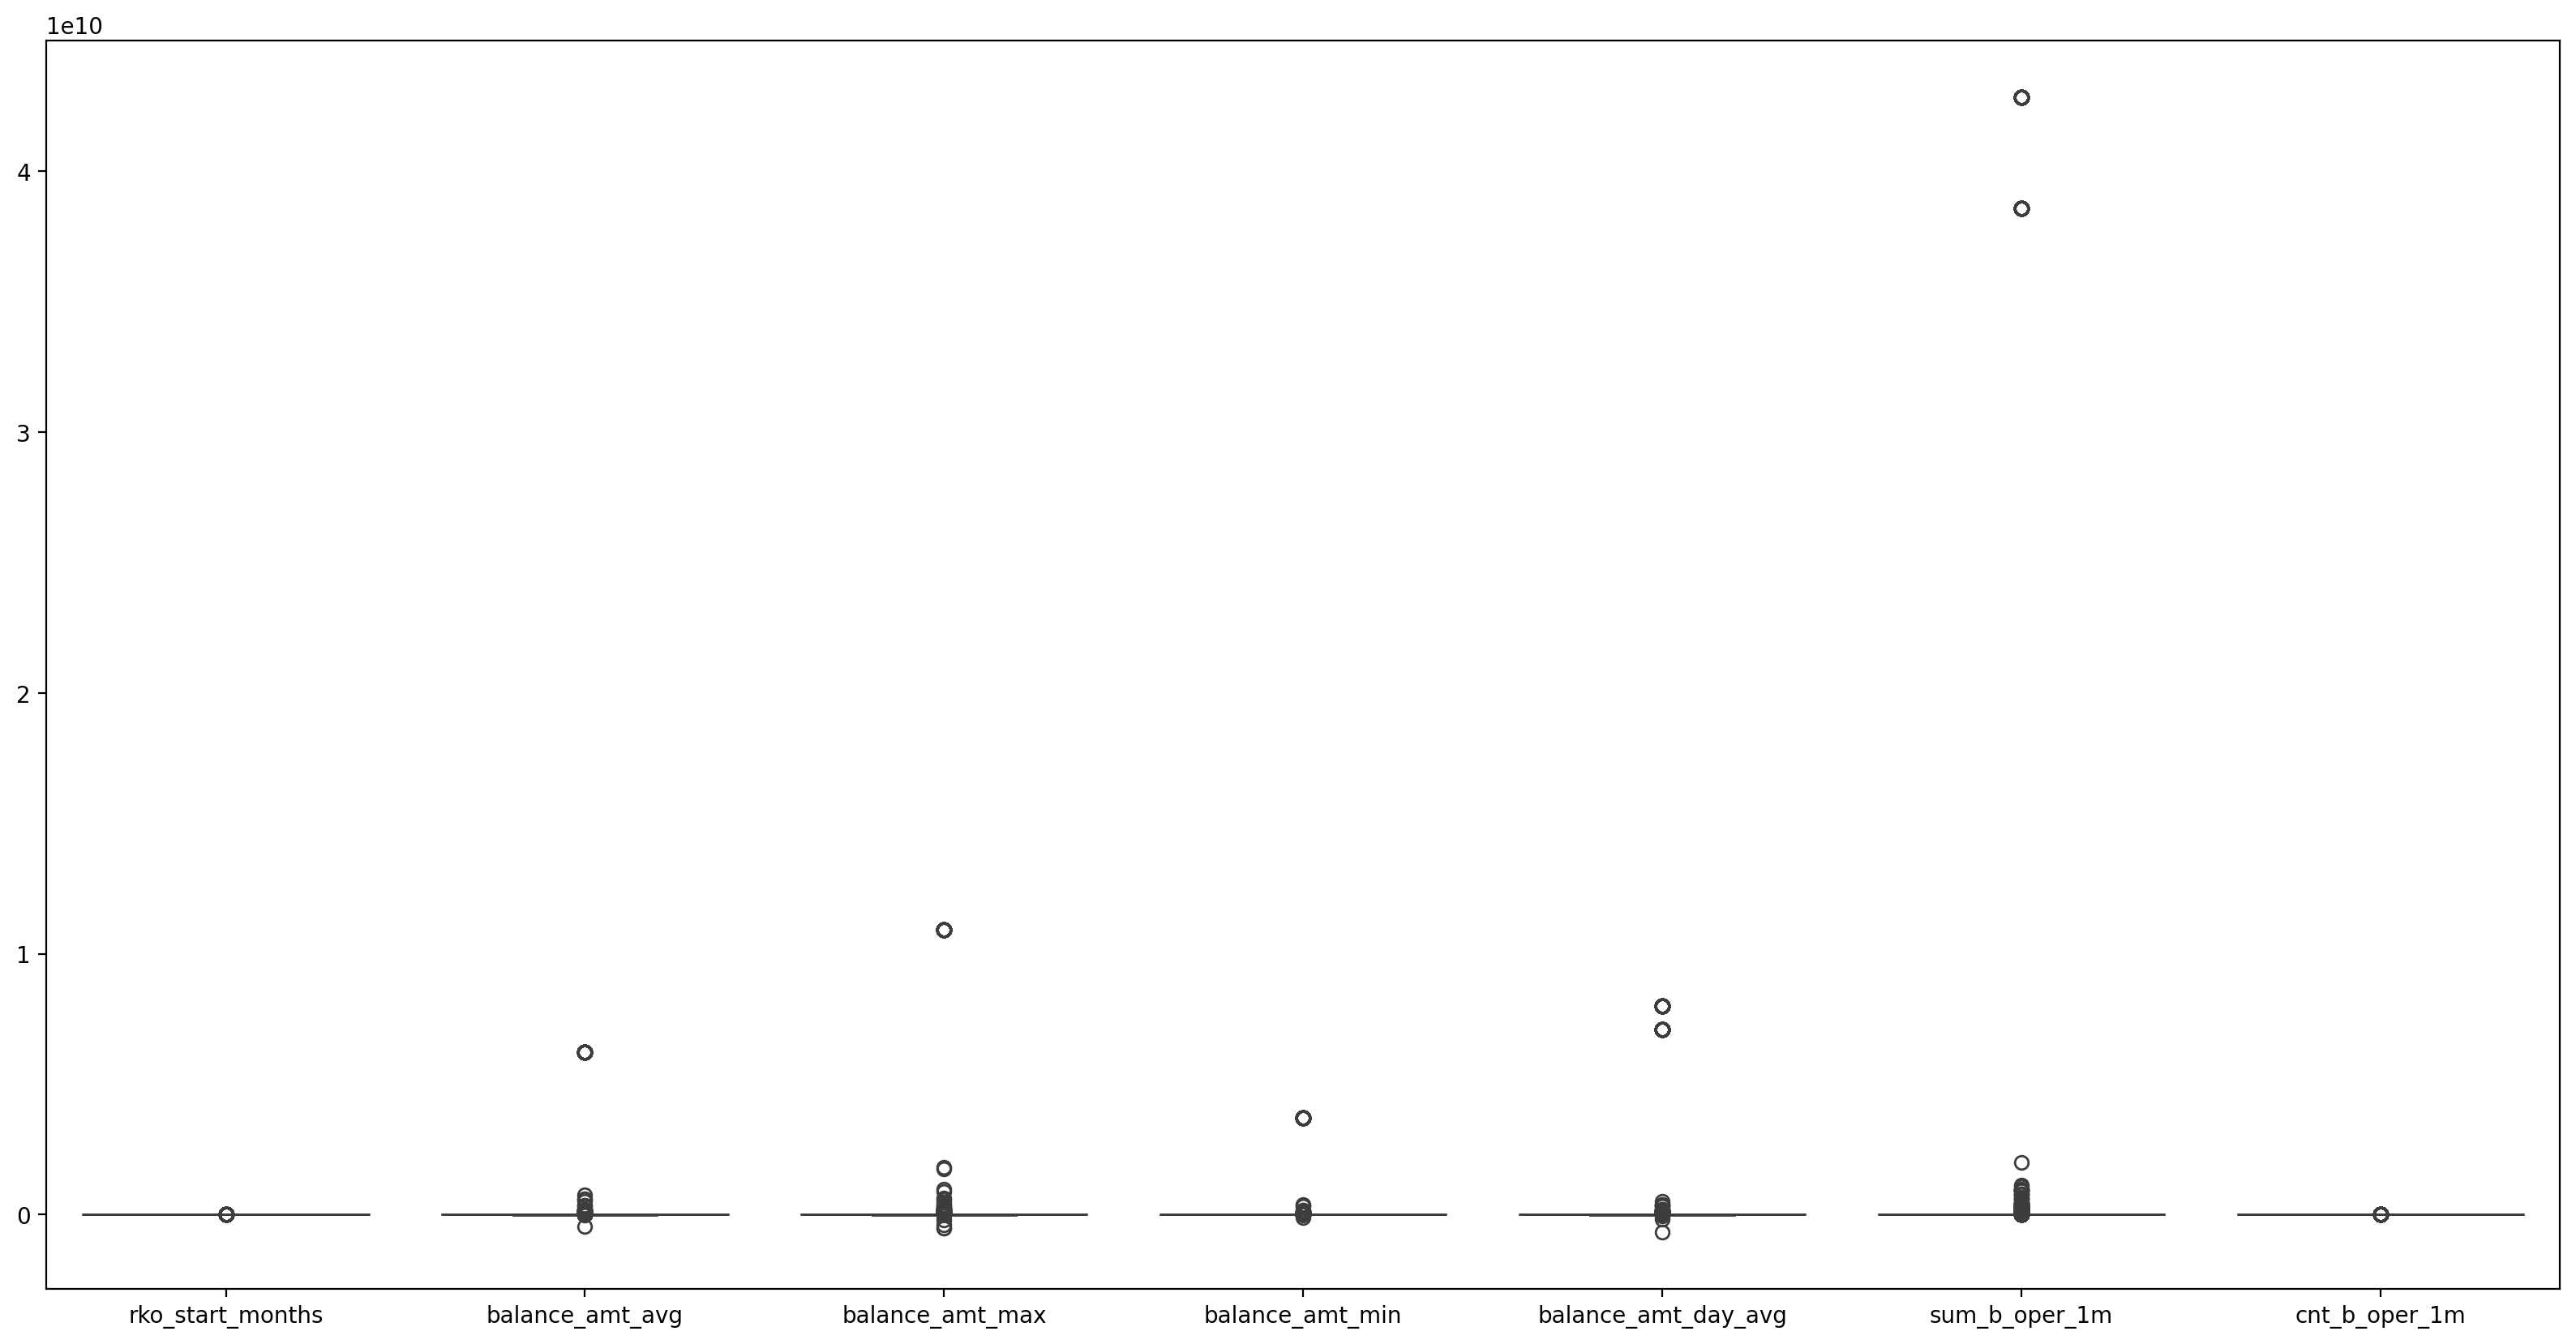

In [ ]:
plt.figure(figsize = (20,10),dpi = 200)
sns.boxplot(df[['rko_start_months', 'balance_amt_avg', 'balance_amt_max',
       'balance_amt_min', 'balance_amt_day_avg','sum_b_oper_1m', 'cnt_b_oper_1m']])


In [ ]:
df.drop('id',axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
rko_start_months,200000.0,4.375292e+01,1.403346e+02,-5.168269e+01,1.409712e+01,3.040711e+01,5.482803e+01,3.352527e+03
balance_amt_avg,200000.0,1.070606e+07,2.499423e+08,-3.535752e+08,3.753360e+04,8.321697e+04,2.934686e+05,6.214443e+09
balance_amt_max,200000.0,1.849138e+07,4.344359e+08,-1.127977e+09,1.049046e+05,2.407511e+05,6.850191e+05,1.093585e+10
balance_amt_min,200000.0,6.511095e+06,1.530444e+08,-1.661454e+08,2.721332e+02,2.401615e+03,3.892890e+04,3.725784e+09
balance_amt_day_avg,200000.0,2.630541e+07,4.400159e+08,-6.399493e+08,4.328432e+04,8.827411e+04,2.994683e+05,7.990053e+09
...,...,...,...,...,...,...,...,...
sum_deb_g_oper_1m_sum_deb_g_oper_3m_comp,200000.0,-2.413988e-10,3.047670e+07,-1.157247e+06,-1.157247e+06,-1.147584e+06,-9.288623e+05,9.428613e+09
sum_cred_g_oper_1m_sum_deb_g_oper_3m_comp,200000.0,-2.574921e-10,3.043069e+07,-1.125767e+06,-1.125766e+06,-1.110803e+06,-8.912513e+05,9.438564e+09
cnt_a_oper_3m_sum_cred_g_oper_3m_comp,200000.0,2.349854e-08,3.508430e+09,-1.447014e+08,-1.447014e+08,-1.447014e+08,-1.446714e+08,8.552176e+10
cnt_deb_g_oper_3m_cnt_deb_h_oper_3m_comp,200000.0,-2.502929e-14,3.555136e+03,-8.338581e+03,-2.013624e+02,-1.948232e+02,-1.675410e+02,9.864814e+04


<Axes: >

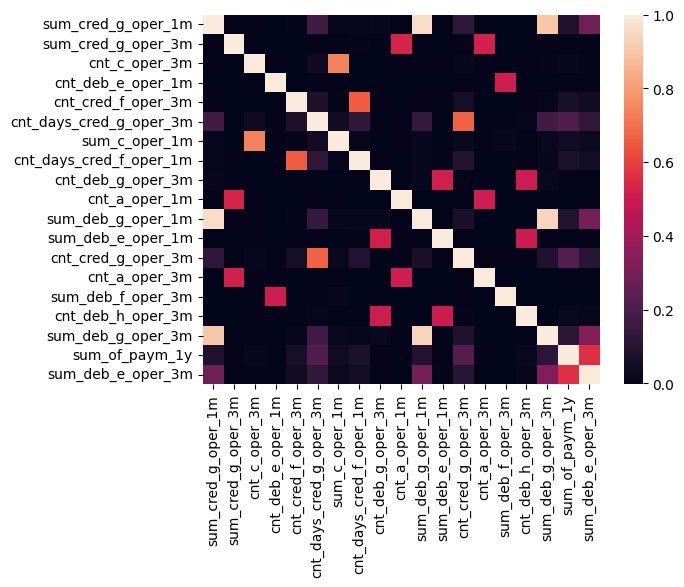

In [ ]:
sns.heatmap(df[list(set(["cnt_deb_h_oper_3m", "sum_of_paym_1y", "sum_deb_e_oper_3m", "cnt_a_oper_1m", "cnt_a_oper_3m",
             "sum_cred_g_oper_3m", "sum_c_oper_1m", "cnt_c_oper_3m", "sum_deb_e_oper_1m", "cnt_deb_g_oper_3m", "cnt_deb_e_oper_1m",
             "sum_deb_f_oper_3m", "cnt_days_cred_f_oper_1m", "cnt_cred_f_oper_3m", "sum_cred_g_oper_1m", "sum_deb_g_oper_1m",
             "sum_deb_g_oper_3m", "sum_cred_g_oper_3m", "cnt_a_oper_3m", "cnt_deb_g_oper_3m", "cnt_deb_h_oper_3m", "cnt_cred_g_oper_3m", "cnt_days_cred_g_oper_3m"]))].corr())

In [ ]:
x_num = pd.DataFrame(x_num,columns = [num_cols])
for col in cat_cols:

  print(col)
  train_ind = list(x[col].dropna().index)
  nan_ind = list(x[col].isnull()[x[col].isnull() == True].index)
  train_y = x[col].dropna()
  test_y = x[col].iloc[nan_ind]

  from lightgbm import LGBMClassifier
  lgb = LGBMClassifier(objective = 'multiclass',num_class = len(train_y.unique()),metric = 'multi_logloss')

  from sklearn.model_selection import GridSearchCV
  param_grid = {'n_estimators':[64,100,128,200],
                'learning_rate':np.linspace(0.1,1,10)}

  grid_model_lgbm = GridSearchCV(estimator = lgb,
                                param_grid = param_grid,
                                scoring = 'roc_auc',
                                n_jobs = -1,
                                verbose = 2,
                                cv = 5)

  grid_model_lgbm.fit(x_num.iloc[train_ind],train_y)
  from sklearn.metrics import classification_report,roc_auc_score
  print(classification_report(train_y,grid_model_lgbm.predict(x_num.iloc[train_ind])))

  df[col] = pd.DataFrame(grid_model_lgbm.predict(test_y), index = test_y.index, columns=[col]).round(0)

channel_code
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 3200, in __init__
    train_set.construct()
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 2276, in construct
    self._lazy_init(data=self.data, label=self.label, reference=None,
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 1959, in _lazy_init
    return self.set_feature_name(feature_name)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 2639, in set_feature_name
    _safe_call(_LIB.LGBM_DatasetSetFeatureNames(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 242, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode('utf-8'))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df,test_size = 0.3,stratify = df['total_target'],random_state = 101)

x_train = train_data.drop(['total_target','target_1','target_2','id'],axis = 1)
x_test = test_data.drop(['total_target','target_1','target_2','id'],axis = 1)
y_train = train_data['total_target']
y_test = test_data['total_target']

y = df['total_target']
x = df.drop(['total_target','target_1','target_2','id'],axis = 1)

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#cat_pipe = Pipeline(steps = [('imp',SimpleImputer(strategy = 'most_frequent')),
#                             ('one',OneHotEncoder(drop = 'first',handle_unknown = 'ignore'))])

#num_pipe = Pipeline(steps = [('imp',IterativeImputer()),
#                                ('std',StandardScaler())])

#from sklearn.compose import ColumnTransformer
#transformer = ColumnTransformer(
#   transformers = [
#          ('cat',cat_pipe,cat_cols),
#          ('num',num_pipe,list(x_train.columns))
#    ]
#)

std = StandardScaler()
std.fit(x,y)
x_tr = std.transform(x_train)
x_te = std.transform(x_test)

In [ ]:
cat_cols = [
    'channel_code', 'city', 'city_type', 'ogrn_month', 'ogrn_year',
    'branch_code', 'okved', 'segment'
]

num_cols = list(df.drop(['channel_code', 'city', 'city_type', 'ogrn_month', 'ogrn_year', 'okved', 'segment','target_1','target_2','total_target'],axis = 1).columns)

df[cat_cols]

KeyError: "['branch_code'] not found in axis"

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
reg_time = LogisticRegression(max_iter = 1000,class_weight = 'balanced')

param_grid = {'C':np.arange(0,10),
              'penalty':['l1','l2','elasticnet'],
              'l1_ratio':np.linspace(0,1,5)}

from sklearn.model_selection import GridSearchCV
grid_log = GridSearchCV(estimator = reg_time,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        n_jobs = -1,
                        verbose = 2,
                        cv = 5)

grid_log.fit(x_tr,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
pred = grid_log.predict_proba(x_te)[:,1]
print('С OneHot с max_iter 5000')
print(classification_report(y_test,grid_log.predict(x_te)))
roc_auc_score(y_test,pred)

С OneHot с max_iter 5000
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     27877
           1       0.16      0.70      0.26      2123

    accuracy                           0.71     30000
   macro avg       0.56      0.71      0.54     30000
weighted avg       0.91      0.71      0.78     30000



0.7754923041837561

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
pred = grid_log.predict_proba(x_te)[:,1]
print('С OneHot с max_iter 5000')
print(classification_report(y_test,grid_log.predict(x_te)))
roc_auc_score(y_test,pred)

С OneHot с max_iter 5000
              precision    recall  f1-score   support

           0       0.95      0.86      0.91     27877
           1       0.20      0.44      0.27      2123

    accuracy                           0.83     30000
   macro avg       0.57      0.65      0.59     30000
weighted avg       0.90      0.83      0.86     30000



0.766292412546191

[CV] END ......................C=0, l1_ratio=0.0, penalty=l2; total time=   0.4s
[CV] END ..............C=0, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END .....................C=0, l1_ratio=0.25, penalty=l1; total time=   0.1s
[CV] END .............C=0, l1_ratio=0.25, penalty=elasticnet; total time=   0.1s
[CV] END ......................C=0, l1_ratio=0.5, penalty=l1; total time=   0.1s
[CV] END ......................C=0, l1_ratio=0.5, penalty=l2; total time=   0.1s
[CV] END .....................C=0, l1_ratio=0.75, penalty=l1; total time=   0.1s
[CV] END .....................C=0, l1_ratio=0.75, penalty=l2; total time=   0.1s
[CV] END ......................C=0, l1_ratio=1.0, penalty=l1; total time=   0.1s
[CV] END ......................C=0, l1_ratio=1.0, penalty=l2; total time=   0.1s
[CV] END ......................C=1, l1_ratio=0.0, penalty=l1; total time=   0.1s
[CV] END ..............C=1, l1_ratio=0.0, penalty=elasticnet; total time=   0.1s
[CV] END ..............C=1, 

In [ ]:
pd.DataFrame(model.feature_importances_)

In [ ]:
def collate_fn(batch):
  targets_list, data_list = [], []

  for (_data_output, _target) in batch:
    targets_list.append(_target)
    data_list.append(_data_output)

  targets_tensor = torch.tensor(targets_list, dtype=torch.int64).to(device)
  data_tensor = torch.tensor(data_list,dtype = torch.int64).to(device)

  return data_tensor.detach(), targets_tensor.detach()

class GetDataset(Dataset):
  def __init__(self,data,prep_x):
    self.data = data
    self.prep_x = prep_x

  def __getitem__(self,ind = int):
    y_data = self.data['total_target']
    prep_data = self.prep_x[ind]
    target = y_data.iloc[ind]

    return prep_data,target

  def __len__(self):
    return len(self.data)

train_dataset = GetDataset(train_data,x_tr)
test_dataset = GetDataset(test_data,x_te)

train_dataloader = DataLoader(train_dataset,shuffle = True,batch_size = 32,collate_fn = collate_fn,drop_last = True)
test_dataloader = DataLoader(test_dataset,shuffle = False,batch_size = 32,collate_fn = collate_fn,drop_last = True)

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(objective = 'binary',boosting_type = 'gbdt',metric = 'binary_loglos',class_weight = 'balanced')

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[64,100,128,200],
              'learning_rate':np.linspace(0.01,1,10),
              'max_depth':[4,7,10]}

grid_model_lgbm = GridSearchCV(estimator = lgb,
                              param_grid = param_grid,
                              scoring = 'roc_auc',
                              n_jobs = -1,
                              verbose = 2,
                              cv = 5)

grid_model_lgbm.fit(x_tr,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
pred = grid_model_lgbm.predict_proba(x_te)[:,1]

print(classification_report(y_test,grid_model_lgbm.predict(x_te)))
roc_auc_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     27877
           1       0.28      0.76      0.40      2123

    accuracy                           0.84     30000
   macro avg       0.63      0.80      0.66     30000
weighted avg       0.93      0.84      0.87     30000



0.8817832781380275

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
pred = lgb.predict_proba(x_te)[:,1]

print(classification_report(y_test,lgb.predict(x_te)))
roc_auc_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     27877
           1       0.28      0.76      0.41      2123

    accuracy                           0.85     30000
   macro avg       0.63      0.81      0.66     30000
weighted avg       0.93      0.85      0.88     30000



0.883033639919226

In [ ]:
pd.DataFrame(grid_model_lgbm.best_estimator_.feature_importances_,index = transformer.get)

,0
0,0
1,0
2,0
3,0
4,1
...,...
120883,18
120884,9
120885,24
120886,17


In [ ]:
imp = pd.DataFrame(grid_model_lgbm.best_estimator_.feature_importances_,index = transformer.get_feature_names_out(),columns = ['imp'])

In [ ]:
imp.sort_values('imp',ascending = False)[imp.sort_values('imp',ascending = False)['imp'] < 10].index

Index(['num__ogrn_days_end_month', 'num__cnt_cred_h_oper_1m',
       'cat__channel_code', 'num__cnt_deb_f_oper_1m', 'cat__ogrn_year',
       'num__cnt_days_cred_h_oper_1m', 'num__cnt_deb_h_oper_1m',
       'cat__segment', 'num__cnt_deb_g_oper_1m', 'num__cnt_cred_g_oper_1m',
       'num__cnt_days_deb_f_oper_1m', 'num__cnt_cred_d_oper_3m',
       'num__sum_b_oper_3m', 'num__cnt_days_cred_h_oper_3m',
       'num__cnt_cred_d_oper_1m', 'num__channel_code',
       'num__cnt_days_cred_f_oper_3m', 'num__cnt_b_oper_3m',
       'num__cnt_days_deb_g_oper_1m', 'num__okved', 'num__branch_code',
       'num__cnt_cred_f_oper_1m', 'num__segment', 'num__ogrn_year',
       'num__ogrn_month'],
      dtype='object')

In [ ]:
dr = ['ogrn_days_end_month', 'cnt_cred_h_oper_1m', 'cnt_deb_f_oper_1m',
       'cnt_days_cred_h_oper_1m', 'cnt_deb_h_oper_1m',
       'cnt_deb_g_oper_1m', 'cnt_cred_g_oper_1m',
       'cnt_days_deb_f_oper_1m', 'cnt_cred_d_oper_3m',
       'sum_b_oper_3m', 'cnt_days_cred_h_oper_3m',
       'cnt_cred_d_oper_1m', 'channel_code',
       'cnt_days_cred_f_oper_3m', 'cnt_b_oper_3m',
       'cnt_days_deb_g_oper_1m', 'okved', 'branch_code',
       'cnt_cred_f_oper_1m', 'segment', 'ogrn_year',
       'ogrn_month']

corr = df.drop(['ogrn_days_end_month', 'cnt_cred_h_oper_1m', 'cnt_deb_f_oper_1m',
       'cnt_days_cred_h_oper_1m', 'cnt_deb_h_oper_1m',
       'cnt_deb_g_oper_1m', 'cnt_cred_g_oper_1m',
       'cnt_days_deb_f_oper_1m', 'cnt_cred_d_oper_3m',
       'sum_b_oper_3m', 'cnt_days_cred_h_oper_3m',
       'cnt_cred_d_oper_1m', 'channel_code',
       'cnt_days_cred_f_oper_3m', 'cnt_b_oper_3m',
       'cnt_days_deb_g_oper_1m', 'okved', 'branch_code',
       'cnt_cred_f_oper_1m', 'segment', 'ogrn_year',
       'ogrn_month','target_1','target_2','total_target'],axis = 1).corr()

,id,rko_start_months,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,target_1,target_2,total_target
0,0,48.871217,27046.725915,7.302090e+04,256.536946,33120.446473,29.0,NaN,NaN,NaN,...,0.064993,3.319602e+04,1.229488,0.396969,3.235240e+05,12.420855,9.069157,1,1,1
1,1,19.530576,54167.143820,1.309506e+05,2928.804640,60240.717448,4.0,8021.0,2497.0,NaN,...,0.270542,3.319549e+04,1.229488,-0.137339,1.456416e+05,2.124925,2.069157,0,0,0
2,2,9.706201,292152.446430,8.272418e+05,39123.394462,298226.317987,26.0,NaN,NaN,NaN,...,23.431839,2.650712e+05,4.229488,3.595162,1.257271e+05,0.999583,1.069157,0,0,0
3,3,92.569902,142491.809620,2.812271e+05,11816.038314,148566.636207,30.0,NaN,NaN,NaN,...,0.990581,4.950943e+05,9.229488,8.582252,3.703923e+05,3.066714,3.069157,0,0,0
4,4,26.538856,72832.525309,1.192327e+05,45824.510960,78907.305464,26.0,311.0,3597.0,NaN,...,0.393927,3.319632e+04,1.229488,0.276606,1.257268e+05,1.219935,1.069157,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,6.282640,27362.473443,7.338409e+04,255.501934,33163.607565,26.0,NaN,NaN,128.0,...,0.075277,3.319600e+04,1.229488,0.640467,1.257276e+05,1.120136,1.069157,0,0,0
68,68,8.826209,184885.306399,5.850591e+05,29456.276675,190960.288725,27.0,NaN,NaN,NaN,...,2.238670,4.049512e+04,4.229488,3.191694,9.512736e+05,12.004667,10.069157,0,0,0
69,69,25.771411,964142.759962,4.835863e+06,255.345901,970216.185436,26.0,6120.0,1252.0,101.0,...,1.868594,1.439660e+07,128.229488,25.891777,2.083445e+07,8.232983,8.069157,0,0,0
70,70,73.753061,38977.171371,3.466159e+05,255.867820,45050.585026,30.0,311.0,3597.0,NaN,...,1.365208,3.319582e+04,1.229488,0.322103,9.930598e+05,6.348079,6.069157,0,0,0


In [ ]:
correlations = x_num.corr()
pairs = []
high_correlations = []
for i in range(len(correlations.columns)):
    for j in range(i+1, len(correlations.columns)):
        if correlations.iloc[i, j] > 0.5:
            high_correlations.append([correlations.columns[i],correlations.columns[j]])

for pair in high_correlations:
    pairs.append(pair)


In [ ]:
pairs

[[('branch_code',), ('cnt_deb_h_oper_3m',)],
 [('sum_of_paym_1y',), ('sum_deb_e_oper_3m',)],
 [('cnt_a_oper_1m',), ('cnt_a_oper_3m',)],
 [('cnt_a_oper_1m',), ('sum_cred_g_oper_3m',)],
 [('sum_c_oper_1m',), ('cnt_c_oper_3m',)],
 [('cnt_c_oper_1m',), ('sum_cred_g_oper_3m',)],
 [('sum_deb_e_oper_1m',), ('cnt_deb_g_oper_3m',)],
 [('cnt_deb_e_oper_1m',), ('sum_deb_f_oper_3m',)],
 [('cnt_days_cred_f_oper_1m',), ('cnt_cred_f_oper_3m',)],
 [('sum_deb_g_oper_1m',), ('sum_cred_g_oper_1m',)],
 [('sum_deb_g_oper_1m',), ('sum_deb_g_oper_3m',)],
 [('sum_cred_g_oper_1m',), ('sum_deb_g_oper_3m',)],
 [('cnt_a_oper_3m',), ('sum_cred_g_oper_3m',)],
 [('cnt_deb_g_oper_3m',), ('cnt_deb_h_oper_3m',)],
 [('cnt_cred_g_oper_3m',), ('cnt_days_cred_g_oper_3m',)]]

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
pred = grid_model_lgbm.predict_proba(x_te)[:,1]

print(classification_report(y_test,grid_model_lgbm.predict(x_te)))
roc_auc_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     27877
           1       0.27      0.77      0.40      2123

    accuracy                           0.84     30000
   macro avg       0.63      0.81      0.66     30000
weighted avg       0.93      0.84      0.87     30000



0.884354072650514

In [ ]:
pd.DataFrame(x_tr)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.074959,-0.040446,-0.040558,-0.042216,-0.058413,-1.000999,-1.296766,0.246783,1.476153,0.730012,...,-0.039522,-0.042034,-0.041822,-0.069331,-0.035251,-0.037437,-0.035910,-0.039522,-0.045499,0.336947
1,-0.067355,-0.041784,-0.040086,-0.042464,-0.059173,1.133644,0.545311,0.246783,-0.176287,-0.982687,...,-0.041244,-0.041601,-0.035389,-0.033180,0.047878,0.119618,0.108761,-0.041244,-0.038768,-0.137484
2,-0.208030,-0.042367,-0.041771,-0.042440,-0.059504,-1.214464,NaN,NaN,-0.535766,-1.553586,...,-0.041244,-0.042845,-0.042941,-0.038747,-0.027114,-0.020351,-0.021020,-0.041244,-0.039612,-0.150061
3,-0.212897,-0.042722,-0.042392,-0.042538,-0.059705,-1.214464,-1.287203,2.757274,0.263247,-0.126338,...,-0.041212,-0.042670,-0.042941,-0.050732,-0.039127,-0.034373,-0.033385,-0.041212,-0.054912,0.041394
4,-0.010171,-0.042604,-0.042189,-0.042542,-0.059639,0.920180,1.568974,0.246783,-0.089667,-0.982687,...,-0.041166,-0.043178,-0.042941,-0.024992,-0.033813,-0.037914,-0.036186,-0.041166,-0.056460,-0.042320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,0.056856,-0.042615,-0.042279,-0.042404,-0.059644,0.920180,NaN,NaN,-0.785746,0.159112,...,-0.041244,-0.043253,-0.042941,-0.036952,-0.039127,-0.037972,-0.036995,-0.041244,-0.056274,-0.139135
139996,0.152734,-0.042300,-0.041130,-0.042327,-0.059466,0.635561,-1.296766,0.246783,1.334518,-0.411787,...,-0.041244,-0.042998,-0.040392,-0.039649,-0.039127,-0.037797,-0.036820,-0.041244,-0.056661,-0.140868
139997,-0.013388,0.106167,0.088694,0.144772,0.024868,0.849025,-0.048361,-2.358129,-1.295804,-1.268137,...,-0.041244,-0.027419,-0.042941,-0.040079,-0.031524,-0.020443,-0.020489,-0.041244,0.002813,-0.159148
139998,0.227921,-0.042529,-0.042224,-0.042371,-0.059596,0.635561,-1.296766,0.246783,0.291931,-1.553586,...,-0.041244,-0.043231,-0.042429,-0.007341,-0.039127,-0.037972,-0.036995,-0.041244,-0.053981,-0.134741


In [ ]:
class MultiHead(nn.Module):
  def __init__(self,hid_dim,n_heads,dropout,device):
    super().__init__()

    assert hid_dim % n_heads == 0
    self.hid_dim = hid_dim
    self.n_heads = n_heads
    self.head_dim = hid_dim // n_heads

    self.fc_q = nn.Linear(hid_dim,hid_dim)
    self.fc_k = nn.Linear(hid_dim,hid_dim)
    self.fc_v = nn.Linear(hid_dim,hid_dim)

    self.fc_o = nn.Linear(hid_dim,hid_dim)
    self.dropout = nn.Dropout(dropout)
    self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

  def forward(self,query,key,value):
    batch_size = query.shape[0]

    Q = self.fc_q(query)
    K = self.fc_k(key)
    V = self.fc_v(value)

    Q = Q.view(batch_size,-1,self.n_heads,self.head_dim).permute(0,2,1,3)
    K = K.view(batch_size,-1,self.n_heads,self.head_dim).permute(0,2,1,3)
    V = V.view(batch_size,-1,self.n_heads,self.head_dim).permute(0,2,1,3)

    energy = torch.matmul(Q,K.permute(0,1,3,2)) / self.scale

    attention = torch.softmax(energy,dim = -1)
    x = torch.matmul(self.dropout(attention),V)
    x = x.permute(0,2,1,3).contiguous()
    x = x.view(batch_size,-1,self.hid_dim)
    x = self.fc_o(x)

    return x,attention

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class SelfAttentionBasedClassifier(nn.Module):
  def __init__(self, hid_dim, cnt_class = 2, device = device, n_heads = 1):
    super().__init__()
    self.hid_dim = hid_dim
    self.device = device
    self.cnt_class = cnt_class

    #self.conv = nn.Conv1d(in_channels = 32,out_channels = 38,kernel_size = 5)
    #self.batch = nn.BatchNorm1d(38)
    #self.conv1 = nn.Conv1d(in_channels = 38,out_channels = 9,kernel_size = 30)
    #self.batch1 = nn.BatchNorm1d(9)
    self.attn = MultiHead(hid_dim = 67, n_heads = n_heads, dropout = 0.1, device = self.device)
    #self.lstm = nn.LSTM(67,120,5,batch_first=True)
    self.linear = nn.Linear(67,100)
    self.batch2 = nn.BatchNorm1d(100)
    self.linear1 = nn.Linear(100,80)
    self.batch3 = nn.BatchNorm1d(80)
    self.linear2 = nn.Linear(80,50)
    self.batch4 = nn.BatchNorm1d(50)
    self.linear3 = nn.Linear(50,10)
    self.classifier_head = nn.Linear(10, self.cnt_class)

    self.dropout = nn.Dropout(p = 0.5)
    self.non_lin = nn.Tanh()

  def forward(self, x):
    x = self.batch(self.non_lin(self.conv(x)))

    print(x)
    #x = self.batch1(self.non_lin(self.conv1(x)))
    x, attention = self.attn(x, x, x)

    x = x[:, 0, :].squeeze()

    x = self.batch2(self.non_lin(self.linear(x)))
    x = self.batch3(self.non_lin(self.linear1(x)))
    x = self.dropout(x)
    x = self.batch4(self.non_lin(self.linear2(x)))
    x = self.linear3(x)
    x = self.classifier_head(x)

    return x, attention

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class LSTM(nn.Module):
  def __init__(self, hid_dim, cnt_class = 2, device = device, n_heads = 67):
    super().__init__()
    self.hid_dim = hid_dim
    self.device = device
    self.cnt_class = cnt_class

    #self.conv = nn.Conv1d(in_channels = 9,out_channels = 38,kernel_size = 30)
    #self.batch = nn.BatchNorm1d(38)
    #self.conv1 = nn.Conv1d(in_channels = 38,out_channels = 9,kernel_size = 30)
    #self.batch1 = nn.BatchNorm1d(9)
    #self.attn = MultiHead(hid_dim = 67, n_heads = n_heads, dropout = 0.1, device = self.device)
    self.lstm = nn.LSTM(67,200,5,batch_first=True)
    self.linear = nn.Linear(67,1000)
    self.batch2 = nn.BatchNorm1d(1000)
    self.linear1 = nn.Linear(1000,750)
    self.batch3 = nn.BatchNorm1d(750)
    self.linear2 = nn.Linear(750,500)
    self.batch4 = nn.BatchNorm1d(500)
    self.linear3 = nn.Linear(500,200)
    self.classifier_head = nn.Linear(200, self.cnt_class)

    self.dropout = nn.Dropout(p = 0.5)
    self.non_lin = nn.Tanh()

  def forward(self, x):
    #x = self.batch(self.non_lin(self.conv(x)))
    #x = self.batch1(self.non_lin(self.conv1(x)))

    h0 = torch.zeros(67, x.size(0), 200).to(x.device)

    c0 = torch.zeros(67, x.size(0), 200).to(x.device)


    x, _ = self.lstm(x, (h0, c0))
    x = self.fc(out[:, -1, :])

    x = self.batch2(self.non_lin(self.linear(x)))
    x = self.batch3(self.non_lin(self.linear1(x)))
    x = self.dropout(x)
    x = self.batch4(self.non_lin(self.linear2(x)))
    x = self.linear3(x)
    x = self.classifier_head(x)
    x = self.classifier_head(out[:, -1, :])
    return x

In [ ]:
len(num_cols)

64

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(67, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
class SaveBestModel:

    def __init__(
        self, best_valid_loss=10,best_roc = 0
    ):
        self.best_valid_loss = best_valid_loss
        self.best_roc = best_roc

    def __call__(
        self, current_valid_loss,currently_roc,
        epoch, model, optimizer, loss_fn
    ):

        if current_valid_loss < self.best_valid_loss and currently_roc >= self.best_roc:
            self.best_valid_loss = current_valid_loss
            self.best_roc = currently_roc
            print(f"\nBest validation loss: {self.best_valid_loss}")
            print(f"\nBest validation roc_auc: {self.best_roc}")
            print(f"\nSaving best model for epoch: {epoch}\n")
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss_fn,
                }, 'Downloads/best_model.pth')

In [ ]:
import torch.optim as optim
from tqdm import tqdm_notebook


model = SelfAttentionBasedClassifier(hid_dim = 112).to(device)
#model = LSTM(hid_dim = 112).to(device)
optimizer = optim.Adam(model.parameters(),lr = 0.001)
loss_fn = nn.CrossEntropyLoss(weight = torch.tensor(weight))
save_best_model = SaveBestModel()

num_epoch = 10
for epoch in range(num_epoch):
  model.train()
  train_acc,total_train,test_acc,total_test = 0,0,0,0
  for i,(x_data,y_data) in enumerate(tqdm_notebook(train_dataloader)):
    optimizer.zero_grad()
    x_data,y_data = x_data.to(device).float(),y_data.to(device).long()
    output,attention = model(x_data)
    #output = model(x_data)
    loss_train = loss_fn(output.double(),y_data)

    #pred = output.argmax(axis=-1)
    _,pred = torch.max(output,1)
    total_train += y_data.shape[0]
    train_acc += (pred == y_data).sum().item()

    from sklearn.metrics import f1_score
    f1_train = f1_score(y_data.cpu(),pred.cpu(),average = 'weighted')

    from sklearn.metrics import roc_auc_score

    try:
        roc_auc_train = roc_auc_score(y_data.cpu(),pred.cpu())
    except ValueError:
        pass

    if i % 200 == 0:
        print('loss_train:{} train_acc:{} f1_train:{} roc_auc_train:{}'.format(loss_train,train_acc / total_train,f1_train,roc_auc_train))

    loss_train.backward()
    optimizer.step()
  model.eval()
  with torch.no_grad():
    for i,(x_data_test,y_data_test) in enumerate(tqdm_notebook(test_dataloader)):
      x_data,y_data = x_data_test.to(device).float(),y_data_test.to(device).long()
      output,attention = model(x_data)
      #output = model(x_data)
      loss_test = loss_fn(output.double(),y_data)
      #pred = output.argmax(axis = -1)
      _,pred = torch.max(output,1)

      total_test += y_data.shape[0]
      test_acc += (pred == y_data).sum().item()

      f1_test = f1_score(y_data.cpu(),pred.cpu(),average = 'weighted')

      try:
        roc_auc_test = roc_auc_score(y_data.cpu(),pred.cpu())
      except ValueError:
        pass

      if i % 71 == 0:
        #print(pred)
        print('loss_test:{} test_acc:{} f1_test:{} roc_auc_test:{}'.format(loss_test,test_acc / total_test,f1_test,roc_auc_test))
        #save_best_model(loss_test,roc_auc_test,epoch + 1,model,optimizer,loss_fn)

    print('epoch {} / 10 loss_train:{} train_acc:{} f1_train:{} | loss_test:{} test_acc:{} f1_test:{}'.format(epoch + 1,loss_train,train_acc / total_train,f1_train,loss_test,test_acc / total_test,f1_test))

/var/folders/vg/9vbx0cqs3yqc931qqxhhx08m0000gn/T/ipykernel_61079/3322739150.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(x_data,y_data) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/4375 [00:00<?, ?it/s]

RuntimeError: value cannot be converted to type int64 without overflow